In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import bokeh
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


# Import

In [2]:
df = pd.read_csv('potpourri/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# EDA

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
284315/(284315+492)

0.9982725143693799

Those are some heavily-imbalanced classes! Accuracy on its own won't be a very good indicator here. We need to focus on precision as a metric for this problem.

Time


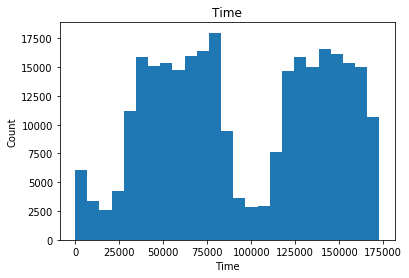

V1


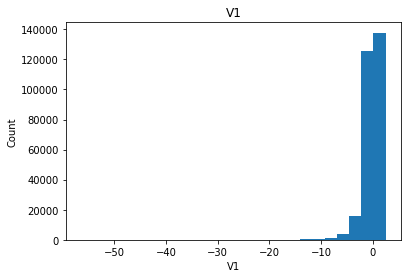

V2


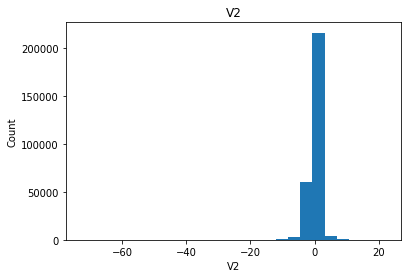

V3


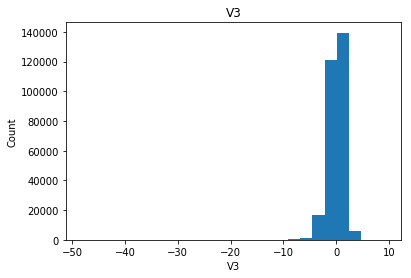

V4


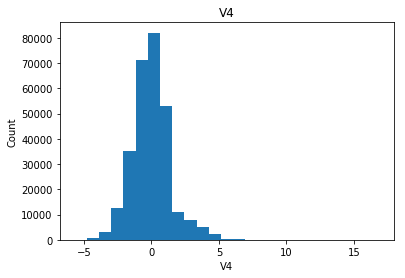

V5


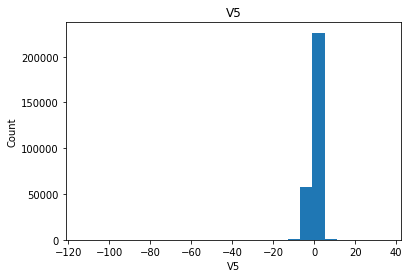

V6


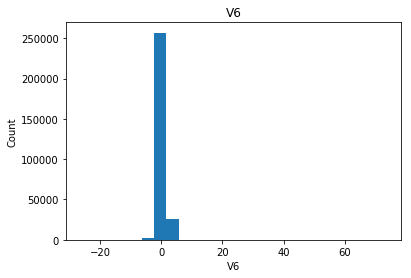

V7


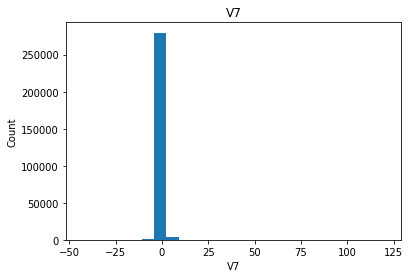

V8


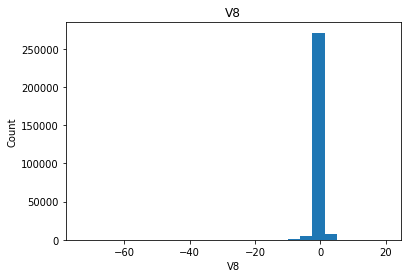

V9


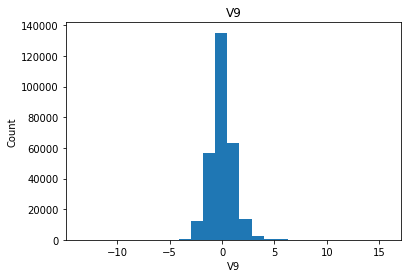

V10


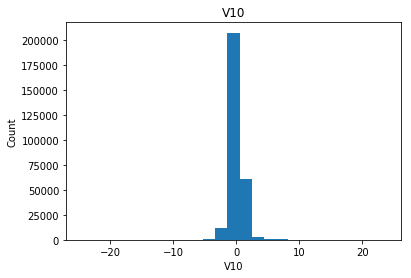

V11


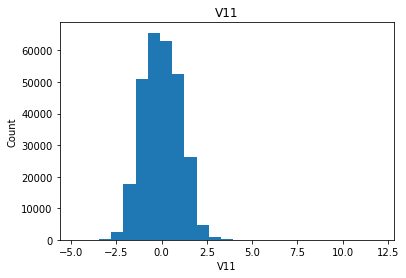

V12


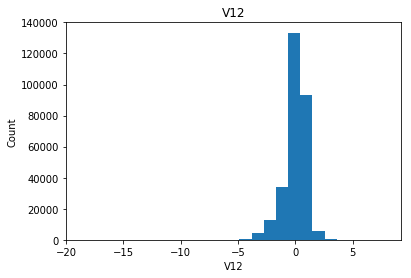

V13


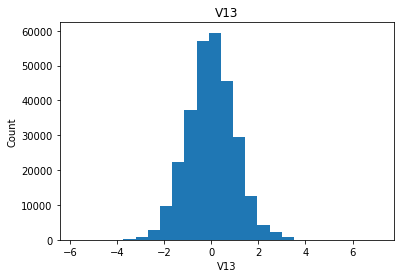

V14


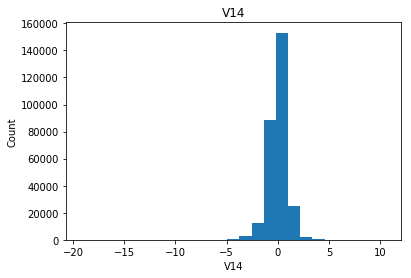

V15


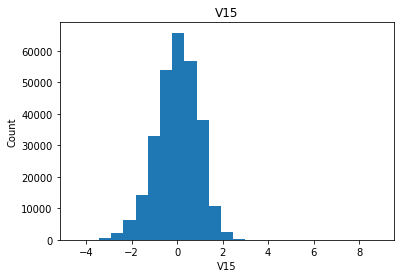

V16


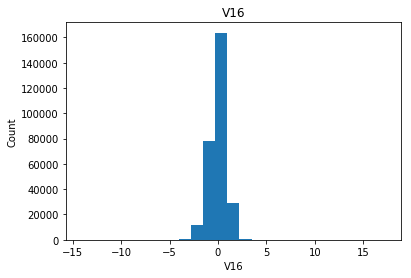

V17


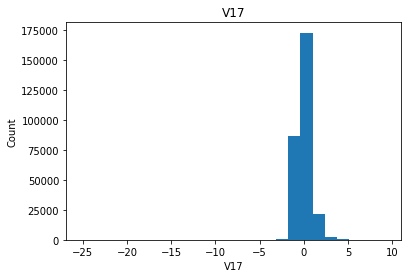

V18


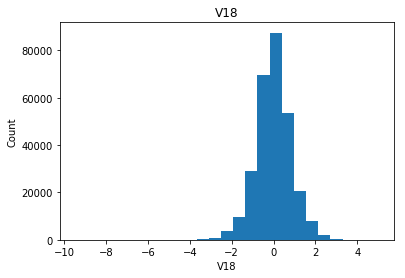

V19


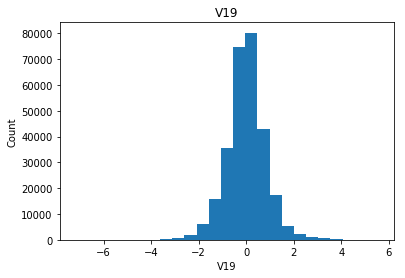

V20


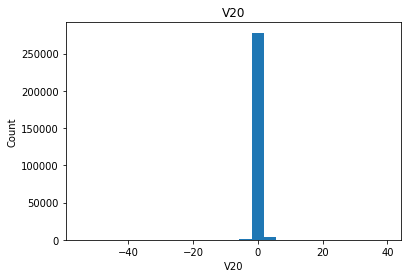

V21


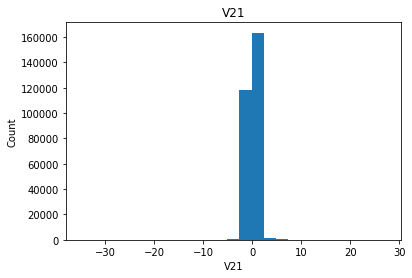

V22


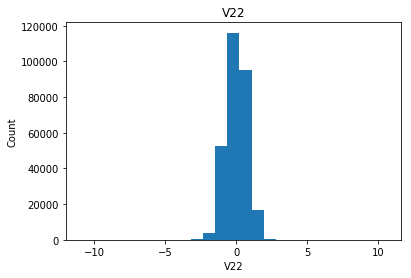

V23


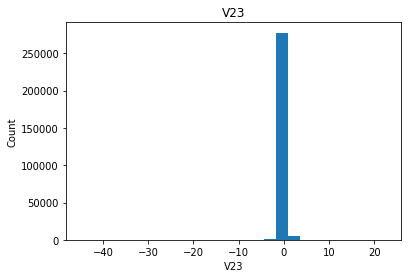

V24


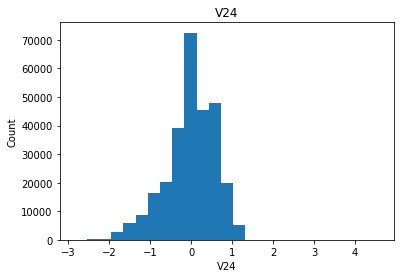

V25


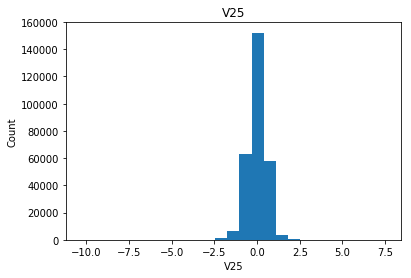

V26


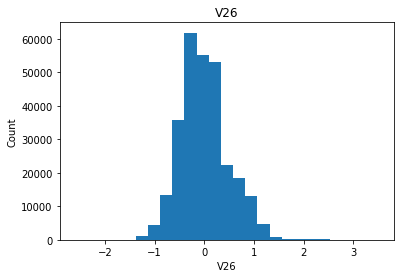

V27


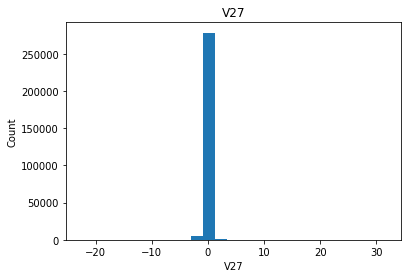

V28


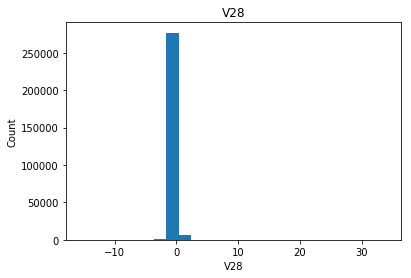

Amount


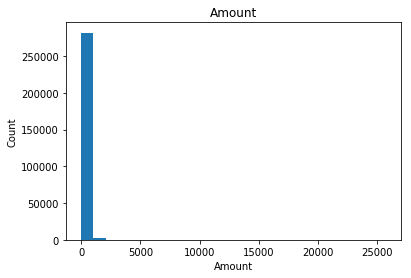

Class


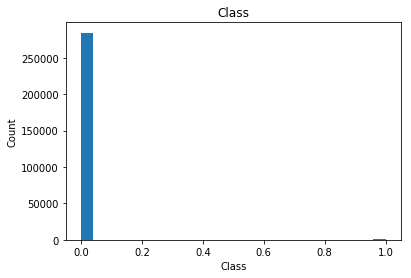

In [7]:
for column in df.columns:
    print(column)
    plt.title(column)
    plt.hist(df[column], bins=25)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Train-Test Split

In [8]:
X = df.drop(['Class'], 1)
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

## Imblearn

Because our dataset is so heavily class-imbalanced, we're going to try out SMOTE and RandomOverSampler from the imblearn module to get a more even effective class split.

### SMOTE

In [10]:
sm = SMOTE(random_state=0)
X_smo, y_smo = sm.fit_resample(X_train, y_train)

In [11]:
len(y_train)

227845

In [12]:
len(y_smo)

454902

### Random Over-Sampler

In [13]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = sm.fit_resample(X_train, y_train)

In [14]:
len(y_train)

227845

In [15]:
len(y_ros)

454902

# Models

In [16]:
# Score Logs:

accuracies = []
precisions = []
recalls = []
f1s = []

## Logistic Regression

### LR on Train Set

In [17]:
lr = LogisticRegression(solver='liblinear', max_iter=200)

In [18]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
lr.score(X_train, y_train)

0.9992451008360947

In [20]:
lr.score(X_test, y_test)

0.9992451107756047

In [21]:
y_pred_lr = lr.predict(X_test)

In [22]:
cr_lr = classification_report(y_test, y_pred_lr, digits=4)

In [23]:
print(cr_lr)

              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8667    0.6633    0.7514        98

   micro avg     0.9992    0.9992    0.9992     56962
   macro avg     0.9330    0.8315    0.8755     56962
weighted avg     0.9992    0.9992    0.9992     56962



In [24]:
pd.crosstab(y_test, y_pred_lr, margins=True)

col_0,0,1,All
Class,,,
0,56854,10,56864
1,33,65,98
All,56887,75,56962


### LR on SMOTE Set

In [25]:
lr2 = LogisticRegression(solver='liblinear', max_iter=200)

In [26]:
lr2.fit(X_smo, y_smo)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
lr2.score(X_smo, y_smo)

0.9690790543897367

In [28]:
lr2.score(X_test, y_test)

0.9827955479091324

In [29]:
y_pred_lr2 = lr2.predict(X_test)

In [30]:
cr_lr2 = classification_report(y_test, y_pred_lr2, digits=4)

In [31]:
print(cr_lr2)

              precision    recall  f1-score   support

           0     0.9998    0.9830    0.9913     56864
           1     0.0808    0.8673    0.1478        98

   micro avg     0.9828    0.9828    0.9828     56962
   macro avg     0.5403    0.9252    0.5696     56962
weighted avg     0.9982    0.9828    0.9899     56962



In [32]:
pd.crosstab(y_test, y_pred_lr2, margins=True)

col_0,0,1,All
Class,,,
0,55897,967,56864
1,13,85,98
All,55910,1052,56962


### LR on RandomOverSampler Set

In [33]:
lr3 = LogisticRegression(solver='liblinear', max_iter=200)

In [34]:
lr3.fit(X_ros, y_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
lr3.score(X_ros, y_ros)

0.9690790543897367

In [36]:
lr3.score(X_test, y_test)

0.9827955479091324

In [37]:
y_pred_lr3 = lr3.predict(X_test)

In [38]:
cr_lr3 = classification_report(y_test, y_pred_lr3, digits=4)

In [39]:
print(cr_lr3)

              precision    recall  f1-score   support

           0     0.9998    0.9830    0.9913     56864
           1     0.0808    0.8673    0.1478        98

   micro avg     0.9828    0.9828    0.9828     56962
   macro avg     0.5403    0.9252    0.5696     56962
weighted avg     0.9982    0.9828    0.9899     56962



In [40]:
pd.crosstab(y_test, y_pred_lr3, margins=True)

col_0,0,1,All
Class,,,
0,55897,967,56864
1,13,85,98
All,55910,1052,56962


## Random Forest Classification

### RFC on Train Set

In [41]:
rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [42]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
rfc.score(X_train, y_train)

0.999863942592552

In [44]:
rfc.score(X_test, y_test)

0.999420666409185

In [45]:
y_pred_rfc = rfc.predict(X_test)

In [46]:
cr_rfc = classification_report(y_test, y_pred_rfc, digits=4)

In [47]:
print(cr_rfc)

              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56864
           1     0.9221    0.7245    0.8114        98

   micro avg     0.9994    0.9994    0.9994     56962
   macro avg     0.9608    0.8622    0.9056     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [48]:
pd.crosstab(y_test, y_pred_rfc, margins=True)

col_0,0,1,All
Class,,,
0,56858,6,56864
1,27,71,98
All,56885,77,56962


### RFC on SMOTE Set

In [49]:
rfc2 = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [50]:
rfc2.fit(X_smo, y_smo)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
rfc2.score(X_smo, y_smo)

1.0

In [52]:
rfc2.score(X_test, y_test)

0.9994733330992591

In [53]:
y_pred_rfc2 = rfc2.predict(X_test)

In [54]:
cr_rfc2 = classification_report(y_test, y_pred_rfc2, digits=4)

In [55]:
print(cr_rfc2)

              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56864
           1     0.8864    0.7959    0.8387        98

   micro avg     0.9995    0.9995    0.9995     56962
   macro avg     0.9430    0.8979    0.9192     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [56]:
pd.crosstab(y_test, y_pred_rfc2, margins=True)

col_0,0,1,All
Class,,,
0,56854,10,56864
1,20,78,98
All,56874,88,56962


### RFC on RandomOverSampler Set

In [57]:
rfc3 = RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [58]:
rfc3.fit(X_ros, y_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [59]:
rfc3.score(X_ros, y_ros)

0.9999934051729823

In [60]:
rfc3.score(X_test, y_test)

0.9995259997893332

In [61]:
y_pred_rfc3 = rfc3.predict(X_test)

In [62]:
cr_rfc3 = classification_report(y_test, y_pred_rfc3, digits=4)

In [63]:
print(cr_rfc3)

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9080    0.8061    0.8541        98

   micro avg     0.9995    0.9995    0.9995     56962
   macro avg     0.9539    0.9030    0.9269     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [64]:
pd.crosstab(y_test, y_pred_rfc3, margins=True)

col_0,0,1,All
Class,,,
0,56856,8,56864
1,19,79,98
All,56875,87,56962


## Gradient-Boosting Decision Tree

### GBDT on Train Set

In [65]:
gbdt = GradientBoostingClassifier(n_estimators=10)

In [66]:
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
gbdt.score(X_train, y_train)

0.9993284908600145

In [68]:
gbdt.score(X_test, y_test)

0.9992626663389628

In [69]:
y_pred_gbdt = gbdt.predict(X_test)

In [70]:
cr_gbdt = classification_report(y_test, y_pred_gbdt, digits=4)

In [71]:
print(cr_gbdt)

              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56864
           1     0.7917    0.7755    0.7835        98

   micro avg     0.9993    0.9993    0.9993     56962
   macro avg     0.8956    0.8876    0.8916     56962
weighted avg     0.9993    0.9993    0.9993     56962



In [72]:
pd.crosstab(y_test, y_pred_gbdt, margins=True)

col_0,0,1,All
Class,,,
0,56844,20,56864
1,22,76,98
All,56866,96,56962


### GBDT on SMOTE Set

In [73]:
gbdt2 = GradientBoostingClassifier(n_estimators=10)

In [74]:
gbdt2.fit(X_smo, y_smo)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [75]:
gbdt2.score(X_smo, y_smo)

0.9660937960263969

In [76]:
gbdt2.score(X_test, y_test)

0.9879042168463186

In [77]:
y_pred_gbdt2 = gbdt2.predict(X_test)

In [78]:
cr_gbdt2 = classification_report(y_test, y_pred_gbdt2, digits=4)

In [79]:
print(cr_gbdt2)

              precision    recall  f1-score   support

           0     0.9998    0.9881    0.9939     56864
           1     0.1117    0.8673    0.1979        98

   micro avg     0.9879    0.9879    0.9879     56962
   macro avg     0.5557    0.9277    0.5959     56962
weighted avg     0.9982    0.9879    0.9925     56962



In [80]:
pd.crosstab(y_test, y_pred_gbdt2, margins=True)

col_0,0,1,All
Class,,,
0,56188,676,56864
1,13,85,98
All,56201,761,56962


### GBDT on RandomOverSampler Set

In [81]:
gbdt3 = GradientBoostingClassifier(n_estimators=10)

In [82]:
gbdt3.fit(X_ros, y_ros)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [83]:
gbdt3.score(X_ros, y_ros)

0.9660937960263969

In [84]:
gbdt3.score(X_test, y_test)

0.9879042168463186

In [85]:
y_pred_gbdt3 = gbdt3.predict(X_test)

In [86]:
cr_gbdt3 = classification_report(y_test, y_pred_gbdt3, digits=4)

In [87]:
print(cr_gbdt3)

              precision    recall  f1-score   support

           0     0.9998    0.9881    0.9939     56864
           1     0.1117    0.8673    0.1979        98

   micro avg     0.9879    0.9879    0.9879     56962
   macro avg     0.5557    0.9277    0.5959     56962
weighted avg     0.9982    0.9879    0.9925     56962



In [88]:
pd.crosstab(y_test, y_pred_gbdt3, margins=True)

col_0,0,1,All
Class,,,
0,56188,676,56864
1,13,85,98
All,56201,761,56962


# Conclusions

In [91]:
models = [lr, lr2, lr3, rfc, rfc2, rfc3, gbdt, gbdt2, gbdt3]
y_preds = [y_pred_lr, y_pred_lr2, y_pred_lr3, y_pred_rfc, y_pred_rfc2,
           y_pred_rfc3, y_pred_gbdt, y_pred_gbdt2, y_pred_gbdt3]

In [92]:
for model, y_pred in zip(models, y_preds):
    accuracies.append(model.score(X_test, y_test))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

In [93]:
score_df = pd.DataFrame()
score_df['model'] = ['lr', 'lr2', 'lr3', 'rfc', 'rfc2', 'rfc3', 'gbdt', 'gbdt2', 'gbdt3']
score_df['accuracy'] = accuracies
score_df['precision'] = precisions
score_df['recall'] = recalls
score_df['f1'] = f1s

In [94]:
score_df

,model,accuracy,precision,recall,f1
0,lr,0.999245,0.866667,0.663265,0.751445
1,lr2,0.982796,0.080798,0.867347,0.147826
2,lr3,0.982796,0.080798,0.867347,0.147826
3,rfc,0.999421,0.922078,0.724490,0.811429
4,rfc2,0.999473,0.886364,0.795918,0.838710
5,rfc3,0.999526,0.908046,0.806122,0.854054
6,gbdt,0.999263,0.791667,0.775510,0.783505
7,gbdt2,0.987904,0.111695,0.867347,0.197905
8,gbdt3,0.987904,0.111695,0.867347,0.197905


The highest F1 score was achieved by the Random Forest Classifier on the SMOTE model.